In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [35]:
dt = pd.read_csv("D:\\BPK Perwakilan Provinsi Maluku\\DATC AKN VI\\DATC Season II\\Data.csv",
                 sep=";", on_bad_lines="skip")
dt.columns

Index(['Akun', 'Risiko', 'AR', 'IR', 'CR', 'Saldo 2022', 'Saldo 2021',
       '% Pertumbuhan', 'Temuan Tahun Sebelumnya', 'Opini',
       'Akun Pengecualian', 'Entitas'],
      dtype='object')

##### Adding Percentage Grwoth Saldo

In [36]:
dt['Pertumbuhan Saldo'] = np.round(np.where(dt['Saldo 2021'] == 0, 0, 
                                   (dt['Saldo 2022'] - dt['Saldo 2021'])/dt['Saldo 2021'] * 100 ), decimals= 2)
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,% Pertumbuhan,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,High,5%,H,M,7102298291,21461118738,"-0,6691",Tidak,WDP,Tidak,BS,-66.91
1,Kas di Bendahara Pengeluaran,High,5%,H,M,0,919574,-1,Tidak,WDP,Ya,BS,-100.00
2,Kas di Bendahara Penerimaan,High,5%,H,M,228539018,403475269,"-0,4336",Tidak,WDP,Tidak,BS,-43.36
3,Kas di Bendahara FKTP,High,5%,H,M,0,10480331,-1,Ya,WDP,Ya,BS,-100.00
4,Kas di Bendahara BOS,High,5%,H,M,470557177,5715111046,"-0,9177",Ya,WDP,Ya,BS,-91.77


In [37]:
def data_characteristics(train):
    
    # displaying shape of the dataset
    print(f'Shape of the Dataset {train.shape}')
    print(f'Number of Columns in the Dataset {train.shape[1]}')
    print(f'Number of Rows in the Dataset {train.shape[0]}')
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = train.select_dtypes(include = [np.number])
    categoric_features = train.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(train.info(verbose = False, memory_usage = "deep")))
    
data_characteristics(dt)
# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
dt.describe(include = "all").transpose()

Shape of the Dataset (177, 13)
Number of Columns in the Dataset 13
Number of Rows in the Dataset 177
Number of Numerical Features : 3
Number of Categorical Features : 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 13 entries, Akun to Pertumbuhan Saldo
dtypes: float64(1), int64(2), object(10)
memory usage: 112.0 KB
Information of the Dataset : None
Statistical Summary of the Dataset : 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Akun,177,116,Lain-lain PAD yang Sah,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risiko,177,3,High,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,177,1,5%,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IR,177,3,H,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CR,177,3,M,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saldo 2022,177.0,NaN,NaN,NaN,203489217314.440674,809723827817.759521,-4070228308827.0,1400660605.0,12558990597.0,140304429233.0,6936014527586.0
Saldo 2021,177.0,NaN,NaN,NaN,199041165840.186432,788333296362.708496,-3639022998839.0,3220185645.0,16963780479.0,117410605438.0,7153496583839.0
% Pertumbuhan,177,155,0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temuan Tahun Sebelumnya,177,5,Tidak,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opini,177,2,WTP,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove Character on Numerical Data and Convert to Numerical Data

In [38]:
dt['AR'] = dt['AR'].str.replace("%","")
# dt['Saldo 2022'] = dt['Saldo 2022'].str.replace("Rp","")
# dt['Saldo 2021'] = dt['Saldo 2021'].str.replace("Rp","")
# dt['% Pertumbuhan'] = dt['% Pertumbuhan'].str.replace("%","")
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,% Pertumbuhan,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,High,5,H,M,7102298291,21461118738,"-0,6691",Tidak,WDP,Tidak,BS,-66.91
1,Kas di Bendahara Pengeluaran,High,5,H,M,0,919574,-1,Tidak,WDP,Ya,BS,-100.00
2,Kas di Bendahara Penerimaan,High,5,H,M,228539018,403475269,"-0,4336",Tidak,WDP,Tidak,BS,-43.36
3,Kas di Bendahara FKTP,High,5,H,M,0,10480331,-1,Ya,WDP,Ya,BS,-100.00
4,Kas di Bendahara BOS,High,5,H,M,470557177,5715111046,"-0,9177",Ya,WDP,Ya,BS,-91.77


In [39]:
dt['AR'] = dt['AR'].apply(pd.to_numeric)
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,% Pertumbuhan,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,High,5,H,M,7102298291,21461118738,"-0,6691",Tidak,WDP,Tidak,BS,-66.91
1,Kas di Bendahara Pengeluaran,High,5,H,M,0,919574,-1,Tidak,WDP,Ya,BS,-100.00
2,Kas di Bendahara Penerimaan,High,5,H,M,228539018,403475269,"-0,4336",Tidak,WDP,Tidak,BS,-43.36
3,Kas di Bendahara FKTP,High,5,H,M,0,10480331,-1,Ya,WDP,Ya,BS,-100.00
4,Kas di Bendahara BOS,High,5,H,M,470557177,5715111046,"-0,9177",Ya,WDP,Ya,BS,-91.77


In [40]:
list_item = []
for col in dt.columns:
    list_item.append([col, dt[col].dtype, dt[col].isna().sum(), round((dt[col].isna().sum()/len(dt[col]))*100,2),
                      dt[col].nunique(), list(dt[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['features', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,features,data_type,null,nulPct,unique,uniqueSample
0,Akun,object,0,0.0,116,"[Piutang PAD Lainnya, Beban Bantuan Sosial, Ge..."
1,Risiko,object,0,0.0,3,"[Medium, High]"
2,AR,int64,0,0.0,1,[5]
3,IR,object,0,0.0,3,"[H, M]"
4,CR,object,0,0.0,3,"[M, M ]"
5,Saldo 2022,int64,0,0.0,159,"[206236616800, 4772253, 860261514057, 20871908..."
6,Saldo 2021,int64,0,0.0,166,"[69079845659, 175020102609, 9893121552, -84798..."
7,% Pertumbuhan,object,0,0.0,155,"[-0,095, 0,075, -0,299, 0,182, -0,5845]"
8,Temuan Tahun Sebelumnya,object,0,0.0,5,"[tidak, Tidak]"
9,Opini,object,0,0.0,2,"[WTP, WDP]"


In [41]:
dt['Temuan Tahun Sebelumnya'] =  dt['Temuan Tahun Sebelumnya'].replace(['Ya','ada','tidak'], 
                                                                       ['Ada','Ada','Tidak'], regex= True)
dt['Akun Pengecualian'] =  dt['Akun Pengecualian'].replace(['tidak'], 'Tidak', regex= True)
dt['CR'] = dt['CR'].str.replace(" ","")

In [42]:
list_item = []
for col in dt.columns:
    list_item.append([col, dt[col].dtype, dt[col].isna().sum(), round((dt[col].isna().sum()/len(dt[col]))*100,2),
                      dt[col].nunique(), list(dt[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['features', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,features,data_type,null,nulPct,unique,uniqueSample
0,Akun,object,0,0.0,116,"[Kas di BLUD, Aset Tetap Jalan, Irigasi, dan J..."
1,Risiko,object,0,0.0,3,"[Medium, High]"
2,AR,int64,0,0.0,1,[5]
3,IR,object,0,0.0,3,[H]
4,CR,object,0,0.0,2,[M]
5,Saldo 2022,int64,0,0.0,159,"[-36976662738, 1493171308, 6782983635, 3828815..."
6,Saldo 2021,int64,0,0.0,166,"[486267102, 20101615000, 108993212728, 1316486..."
7,% Pertumbuhan,object,0,0.0,155,"[0,14, -0,718, 1,2369, 0,473, -0,4461]"
8,Temuan Tahun Sebelumnya,object,0,0.0,2,"[Tidak, Ada]"
9,Opini,object,0,0.0,2,"[WDP, WTP]"


##### Review Akun Belanja

In [43]:
dt.Akun[dt['Akun'].str.contains('Belanja')].value_counts()

Akun
Belanja Pegawai                         3
Belanja Tak Terduga                     3
Belanja Peralatan dan Mesin             3
Belanja Jalan, Irigasi dan Jaringan     2
Belanja Tanah                           2
Belanja Barang dan Jasa                 2
Belanja Aset Tetap Lainnya              2
Belanja Gedung dan Bangunan             2
Belanja Jalan, Irigasi dan Jaringan     1
Belanja Barang  dan Jasa                1
Belanja Tanah                           1
Belanja Bunga                           1
Belanja Hibah                           1
Belanja Subsidi                         1
Belanja gedung dan Bangunan             1
Belanja Aset Tetap lainnya              1
Belanja Dibayar Dimuka                  1
Name: count, dtype: int64

In [44]:
dt.Akun[dt['Akun'].str.contains('Belanja Jalan')]

39     Belanja Jalan, Irigasi dan Jaringan 
78      Belanja Jalan, Irigasi dan Jaringan
134     Belanja Jalan, Irigasi dan Jaringan
Name: Akun, dtype: object

In [45]:
dt['Akun'] = dt['Akun'].str.rstrip() # remove space behind and in front of

In [46]:
dt['Akun'] = dt['Akun'].str.replace('Belanja Barang  dan Jasa', 'Belanja Barang dan Jasa', regex = True)
dt['Akun'] = dt['Akun'].str.replace('Belanja gedung dan Bangunan', 'Belanja Gedung dan Bangunan', regex = True)
dt['Akun'] = dt['Akun'].str.replace('Belanja Aset Tetap lainnya', 'Belanja Aset Tetap Lainnya', regex = True)

In [47]:
dt.Akun[dt['Akun'].str.contains("Belanja")].value_counts()

Akun
Belanja Pegawai                        3
Belanja Barang dan Jasa                3
Belanja Tanah                          3
Belanja Peralatan dan Mesin            3
Belanja Gedung dan Bangunan            3
Belanja Jalan, Irigasi dan Jaringan    3
Belanja Aset Tetap Lainnya             3
Belanja Tak Terduga                    3
Belanja Subsidi                        1
Belanja Hibah                          1
Belanja Bunga                          1
Belanja Dibayar Dimuka                 1
Name: count, dtype: int64

##### Review Akun PAD

In [48]:
dt.Akun[dt["Akun"].str.contains("Pendapatan")].value_counts()

Akun
Pendapatan Hasil Pengelolaan Kekayaan Daerah yang Dipisahkan               4
Pendapatan Retribusi Daerah                                                4
Pendapatan Pajak Daerah                                                    4
Pendapatan Diterima Dimuka                                                 2
Pendapatan Luar Biasa                                                      2
Pendapatan Hibah                                                           2
Lain-Lain Pendapatan yang Sah                                              2
Bagi Hasil Pendapatan Lainnya                                              1
Pendapatan Bagi Hasil Lainnya                                              1
PAD Pendapatan Pajak Daerah                                                1
PAD Pendapatan Retribusi Daerah                                            1
PAD - Pendapatan Rettribusi Daerah                                         1
PAD - Pendapatan Pajak Daerah                                          

In [49]:
dt.Akun[dt["Akun"].str.contains("PAD")].value_counts()

Akun
Lain-lain PAD yang Sah                                              6
Piutang PAD Lainnya                                                 2
PAD Pendapatan Pajak Daerah                                         1
PAD Pendapatan Retribusi Daerah                                     1
PAD Pendapatan Hasil Pengelolaan Kekayaan Daerah yang Dipisahkan    1
PAD - Pendapatan Pajak Daerah                                       1
PAD - Pendapatan Rettribusi Daerah                                  1
PAD - Hasil Kekayaan Daerah yang Dipisahkan                         1
Name: count, dtype: int64

In [50]:
dt['Akun'] = dt['Akun'].replace(["Pendapatan Pajak Daerah",'PAD Pendapatan Pajak Daerah'], ['PAD - Pendapatan Pajak Daerah',
                                'PAD - Pendapatan Pajak Daerah'])
dt['Akun'] = dt['Akun'].replace(['PAD Pendapatan Retribusi Daerah','PAD - Pendapatan Rettribusi Daerah',
                                'Pendapatan Retribusi Daerah'], 
                                    ['PAD - Pendapatan Retribusi Daerah','PAD - Pendapatan Retribusi Daerah',
                                    'PAD - Pendapatan Retribusi Daerah'])
dt['Akun'] = dt['Akun'].replace(['Pendapatan Hasil Pengelolaan Kekayaan Daerah yang Dipisahkan',
                                'PAD Pendapatan Hasil Pengelolaan Kekayaan Daerah yang Dipisahkan'], 
                                'PAD - Hasil Kekayaan Daerah yang Dipisahkan')

In [51]:
dt.Akun[dt["Akun"].str.contains("PAD")].value_counts()

Akun
PAD - Pendapatan Pajak Daerah                  6
PAD - Pendapatan Retribusi Daerah              6
PAD - Hasil Kekayaan Daerah yang Dipisahkan    6
Lain-lain PAD yang Sah                         6
Piutang PAD Lainnya                            2
Name: count, dtype: int64

In [52]:
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,% Pertumbuhan,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,High,5,H,M,7102298291,21461118738,"-0,6691",Tidak,WDP,Tidak,BS,-66.91
1,Kas di Bendahara Pengeluaran,High,5,H,M,0,919574,-1,Tidak,WDP,Ya,BS,-100.00
2,Kas di Bendahara Penerimaan,High,5,H,M,228539018,403475269,"-0,4336",Tidak,WDP,Tidak,BS,-43.36
3,Kas di Bendahara FKTP,High,5,H,M,0,10480331,-1,Ada,WDP,Ya,BS,-100.00
4,Kas di Bendahara BOS,High,5,H,M,470557177,5715111046,"-0,9177",Ada,WDP,Ya,BS,-91.77


In [53]:
dt.drop(['AR','Saldo 2021','% Pertumbuhan','Opini'], axis = 1, inplace = True)

#### Exploratory Data Analytics

In [54]:
dt['Risiko'].value_counts()

Risiko
High      99
Medium    76
Low        2
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

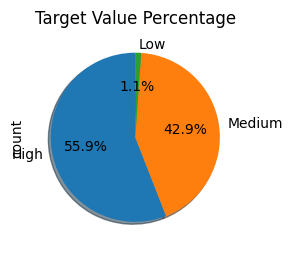

In [55]:
import matplotlib.pyplot as plt

dt['Risiko'].value_counts().plot(kind='pie', 
                                    subplots=True, 
                                    shadow = True,
                                    startangle=90,
                                    figsize=(3,3), 
                                    labels = ['High', 'Medium', 'Low'],
                                    autopct='%1.1f%%')
plt.title('Target Value Percentage')
plt.tight_layout()
plt.show

         Saldo 2022
count  1.770000e+02
mean   2.034892e+11
std    8.097238e+11
min   -4.070228e+12
25%    1.400661e+09
50%    1.255899e+10
75%    1.403044e+11
max    6.936015e+12

Distribution of data before being handled by Outliers: 


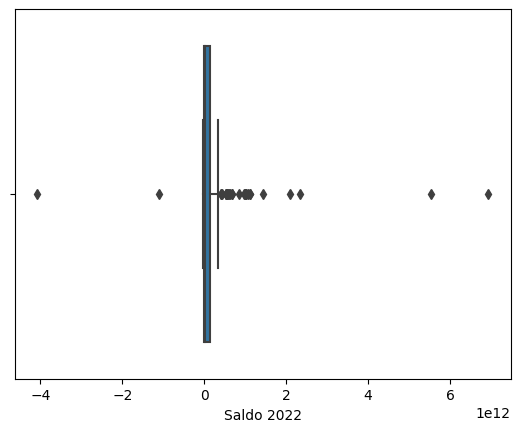

In [56]:
def outlier_checking(dt):
    
    col = ["Saldo 2022"]
    print(dt[col].describe())
    
    print('\nDistribution of data before being handled by Outliers: ')
    # checking the distribution of features of the dataset
    for i in col:
        plt.figure() # untuk membuat figure baru
        sns.boxplot(x=dt[i])
        plt.show()
    
outlier_checking(dt)

In [57]:
col = ['Saldo 2022']

Q1 = dt[col].quantile(0.25)
Q3 = dt[col].quantile(0.75)

IQR = Q3 - Q1

# Extreme Outliers
minimum = Q1 - (IQR*3)
print(f'minimum value for each variable are: \n {minimum}')
maksimum = Q3 + (IQR*3)
print(f'maksimum value for each variable are: \n {maksimum}')

minimum value for each variable are: 
 Saldo 2022   -4.153106e+11
dtype: float64
maksimum value for each variable are: 
 Saldo 2022    5.570157e+11
dtype: float64


In [58]:
dt.head()

,Akun,Risiko,IR,CR,Saldo 2022,Temuan Tahun Sebelumnya,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,High,H,M,7102298291,Tidak,Tidak,BS,-66.91
1,Kas di Bendahara Pengeluaran,High,H,M,0,Tidak,Ya,BS,-100.00
2,Kas di Bendahara Penerimaan,High,H,M,228539018,Tidak,Tidak,BS,-43.36
3,Kas di Bendahara FKTP,High,H,M,0,Ada,Ya,BS,-100.00
4,Kas di Bendahara BOS,High,H,M,470557177,Ada,Ya,BS,-91.77


In [59]:
from sklearn import preprocessing 
category_col =['Akun','Risiko','IR','CR', 'Temuan Tahun Sebelumnya','Akun Pengecualian', 'Entitas']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    dt[col] = labelEncoder.fit_transform(dt[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict)

{'Akun': {'Akum. Amortisasi Aset Tak Berwujud': 0, 'Akumulasi Penyusutan': 1, 'Aset Lain-lain': 2, 'Aset Lainnya Aset Lain-Lain': 3, 'Aset Tak Berwujud': 4, 'Aset Tetap Akumulasi Penyusutan': 5, 'Aset Tetap Aset Tetap Lainnya': 6, 'Aset Tetap Gedung dan Bangunan': 7, 'Aset Tetap Jalan, Irigasi, dan Jaringan': 8, 'Aset Tetap Konstruksi dalam Pengerjaan': 9, 'Aset Tetap Lainnya': 10, 'Aset Tetap Peralatan dan Mesin': 11, 'Aset Tetap Tanah': 12, 'Aset Tidak Berwujud': 13, 'Bagi Hasil Pajak': 14, 'Bagi Hasil Pendapatan Lainnya': 15, 'Bagi Hasil Retribusi': 16, 'Bantuan Keuangan': 17, 'Bantuan Keuangan Lainnya': 18, 'Bantuan Sosial': 19, 'Beban Bantuan Sosial': 20, 'Beban Hibah': 21, 'Beban Jasa': 22, 'Beban Lain-Lain': 23, 'Beban Lain-lain': 24, 'Beban Luar Biasa': 25, 'Beban Pegawai': 26, 'Beban Pemeliharaan': 27, 'Beban Penyisihan Piutang': 28, 'Beban Penyusutan': 29, 'Beban Penyusutan dan Amortisasi': 30, 'Beban Perjalanan Dinas': 31, 'Beban Subsidi': 32, 'Beban Transfer': 33, 'Belanja 

In [60]:
dt.head()

,Akun,Risiko,IR,CR,Saldo 2022,Temuan Tahun Sebelumnya,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,63,0,0,1,7102298291,1,0,0,-66.91
1,62,0,0,1,0,1,1,0,-100.00
2,61,0,0,1,228539018,1,0,0,-43.36
3,60,0,0,1,0,0,1,0,-100.00
4,58,0,0,1,470557177,0,1,0,-91.77


In [61]:
dt.columns = dt.columns.str.replace(' ','_')
dt.columns

Index(['Akun', 'Risiko', 'IR', 'CR', 'Saldo_2022', 'Temuan_Tahun_Sebelumnya',
       'Akun_Pengecualian', 'Entitas', 'Pertumbuhan_Saldo'],
      dtype='object')

In [62]:
new_order = ['Entitas','Akun','IR','CR','Temuan_Tahun_Sebelumnya','Akun_Pengecualian','Saldo_2022','Pertumbuhan_Saldo','Risiko']

dt = dt.reindex(columns=new_order)
dt.head()

,Entitas,Akun,IR,CR,Temuan_Tahun_Sebelumnya,Akun_Pengecualian,Saldo_2022,Pertumbuhan_Saldo,Risiko
0,0,63,0,1,1,0,7102298291,-66.91,0
1,0,62,0,1,1,1,0,-100.00,0
2,0,61,0,1,1,0,228539018,-43.36,0
3,0,60,0,1,0,1,0,-100.00,0
4,0,58,0,1,0,1,470557177,-91.77,0


### Building Model Machine Learning

In [63]:
from sklearn.model_selection import train_test_split

x = dt.drop('Risiko', axis = 1)
y = dt['Risiko']

from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0, 1))
# X = scaler.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', Y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(Y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', Y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(Y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (141, 8) , sedangkan Jumlah baris dan kolom dari y_train adalah: (141,)
Prosentase Churn di data Training adalah:
Risiko
0    0.531915
2    0.460993
1    0.007092
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (36, 8) , sedangkan Jumlah baris dan kolom dari y_test adalah: (36,)
Prosentase Churn di data Testing adalah:
Risiko
0    0.666667
2    0.305556
1    0.027778
Name: proportion, dtype: float64


##### Multinomial Regression

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score

# fit the model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, Y_train)

# make prediction
train_pred_log = logreg.predict(X_train)
pred_log = logreg.predict(X_test)

cm_log_train = confusion_matrix(Y_train, train_pred_log)
cm_log = confusion_matrix(Y_test, pred_log )


print('=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_log))
print()
# tn, fp, fn, tp = confusion_matrix(Y_train, train_pred_log).ravel()
# print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

print('=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_log))
print()
# tn, fp, fn, tp = confusion_matrix(Y_test,pred_log).ravel()
# print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       0.54      0.99      0.70        75
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        65

    accuracy                           0.52       141
   macro avg       0.18      0.33      0.23       141
weighted avg       0.29      0.52      0.37       141


=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        24
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.22      0.31      0.25        36
weighted avg       0.43      0.61      0.51        36




C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [66]:
# fit the model
dr = DecisionTreeClassifier()
dr.fit(X_train, Y_train)

# make prediction
train_pred_dt = dr.predict(X_train)
pred_dt = dr.predict(X_test)

cm_dt_train = confusion_matrix(Y_train, train_pred_dt)
cm_dt = confusion_matrix(Y_test, pred_dt)


print('=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============')
print(classification_report(Y_train, train_pred_dt))
print()

print('=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_dt))
print()

=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        65

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11

    accuracy                           0.92        36
   macro avg       0.60      0.64      0.61        36
weighted avg       0.91      0.92      0.91        36




C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [67]:
# fit the model
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# make prediction
train_pred_dt = rf.predict(X_train)
pred_dt = rf.predict(X_test)

cm_dt_train = confusion_matrix(Y_train, train_pred_dt)
cm_dt = confusion_matrix(Y_test, pred_dt)


print('=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============')
print(classification_report(Y_train, train_pred_dt))
print()

print('=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_dt))
print()

=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        65

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11

    accuracy                           0.92        36
   macro avg       0.60      0.64      0.61        36
weighted avg       0.91      0.92      0.91        36




C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier().fit(X_train, Y_train)

# make prediction
train_pred_gbt = gbt.predict(X_train)
pred_gbt = gbt.predict(X_test)

cm_gbt_train = confusion_matrix(Y_train, train_pred_gbt)
cm_gbt = confusion_matrix(Y_test, pred_gbt)

print('=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_gbt))
print()

print('=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_gbt))
print()

=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        65

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.93      0.94      0.93        36




C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import top_k_accuracy_score

xgb = XGBClassifier().fit(X_train, Y_train)

# make prediction
train_pred_xgb = xgb.predict(X_train)
pred_xgb = xgb.predict(X_test)
pred_xgb_prob = xgb.predict_proba(X_test)

cm_xgb_train = confusion_matrix(Y_train, train_pred_xgb)
cm_xgb= confusion_matrix(Y_test, pred_xgb)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_xgb))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_xgb))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        65

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11

    accuracy                           0.92        36
   macro avg       0.60      0.64      0.61        36
weighted avg       0.91      0.92      0.91        36




C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [70]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=101).fit(X_train, Y_train)

# make prediction
train_pred_xgb = xgb.predict(X_train)
pred_xgb = xgb.predict(X_test)

cm_xgb_train = confusion_matrix(Y_train, train_pred_xgb)
cm_xgb= confusion_matrix(Y_test, pred_xgb)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_xgb))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_xgb))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        65

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11

    accuracy                           0.92        36
   macro avg       0.60      0.64      0.61        36
weighted avg       0.91      0.92      0.91        36




C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, Y_train)

# make prediction
train_pred_gbt = knn.predict(X_train)
pred_gbt = knn.predict(X_test)

cm_gbt_train = confusion_matrix(Y_train, train_pred_gbt)
cm_gbt = confusion_matrix(Y_test, pred_gbt)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_train, train_pred_gbt))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_gbt))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        75
           1       0.00      0.00      0.00         1
           2       0.72      0.60      0.66        65

    accuracy                           0.70       141
   macro avg       0.47      0.47      0.47       141
weighted avg       0.70      0.70      0.70       141


=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       0.62      0.54      0.58        24
           1       0.00      0.00      0.00         1
           2       0.27      0.36      0.31        11

    accuracy                           0.47        36
   macro avg       0.30      0.30      0.30        36
weighted avg       0.49      0.47      0.48        36




C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import top_k_accuracy_score

xgb = XGBClassifier(eta = 0.005, max_depth = 4, reg_lambda = 3).fit(X_train, Y_train)
# xgb = XGBClassifier(eta = 0.1, max_depth = 2, reg_lambda = 6).fit(X_train, Y_train)

# make prediction
train_pred_xgb = xgb.predict(X_train)
pred_xgb = xgb.predict(X_test)
pred_xgb_prob = xgb.predict_proba(X_test)

cm_xgb_train = confusion_matrix(Y_train, train_pred_xgb)
cm_xgb= confusion_matrix(Y_test, pred_xgb)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_xgb))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_xgb))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.00      0.00      0.00         1
           2       0.97      0.97      0.97        65

    accuracy                           0.97       141
   macro avg       0.65      0.65      0.65       141
weighted avg       0.96      0.97      0.97       141


=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.93      0.94      0.93        36




C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

#### Saving Model

In [73]:
import pickle

filename = 'Risk_Modelling.sav'
pickle.dump(gbt, open(filename, 'wb'))

In [74]:
input_data = (1,0,0,0,1,1,0,-100)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# scaler = MinMaxScaler(feature_range = (0, 1))
# input_data_as_numpy_array_scaler = scaler.fit_transform(input_data_reshaped)

prediction = gbt.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('High')
elif (prediction[0] == 1):
  print("Low")
else:
  print('Medium')

[2]
Medium


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
